# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing

## Preprocessing imports

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
filename = 'low_q_uniform_weight'
weighted_sm = pd.read_csv(f'data/{filename}.csv', index_col=0)

In [5]:
features = ['l']
# features = ['q2','k','l','p']
targets_single = ['c9']
targets_multi = ['c9', 'c10']

X_train, X_test, y_train, y_test = train_test_split(weighted_sm[features + ['weight']], weighted_sm[targets_single])
X_train_weight, X_test_weight = X_train['weight'], X_test['weight']
X_train, X_test = X_train[features], X_test[features]

## EDA

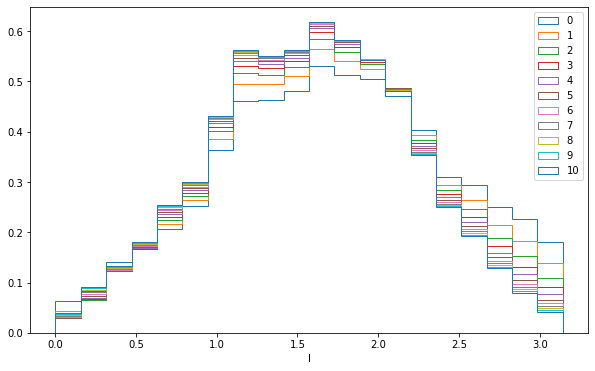

In [6]:
plt.figure(figsize=(10,6))
for c in weighted_sm['c9'].unique():
    plt.hist(
        weighted_sm.loc[weighted_sm['c9'] == 0, 'l'], 
        weights=weighted_sm.loc[weighted_sm['c9'] == c, 'weight'], 
        density=True, 
        alpha=1, 
        bins=20, 
        label=f'{c}', 
        histtype='step',
        # color='blue'
    )

plt.xlabel('l')
plt.legend()
plt.show()

In [7]:
# weighted_sm[features + targets_single].iloc[::5000]
# pd.plotting.andrews_curves(weighted_sm[features + targets_single].iloc[:5000], 'c9')

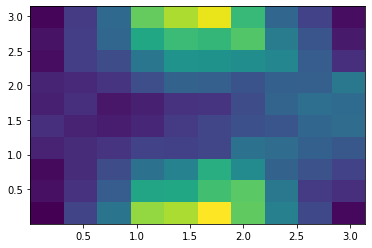

In [8]:
plt.hist2d(weighted_sm['l'], weighted_sm['k'])
plt.show()

# Model Creation and Evaluation

## ML Imports

In [9]:
from xgboost import XGBRegressor, XGBClassifier
from sklearn.neural_network import MLPRegressor

## Modelling

### XGBoost

In [10]:
#  XGB REGRESSOR
xgb_reg = XGBRegressor(n_estimators=300, max_depth=3, learning_rate=0.1, subsample=1, random_state=123123)
xgb_reg.fit(X_train, y_train, sample_weight=X_train_weight)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=123123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [11]:
test_sm = X_test[y_test['c9'] == 0]
sm_prediction = xgb_reg.predict(test_sm)

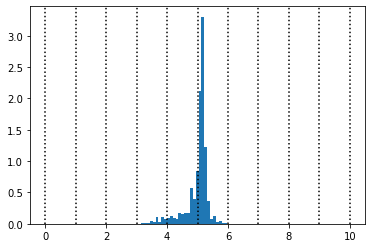

In [12]:
target_lines = y_test['c9'].unique()
plt.hist(sm_prediction, bins=30,density=True)
for l in target_lines:
    plt.axvline(l, c='black', linestyle=':')
plt.show()

(array([  2.,   4.,   4.,  26.,  18.,  14.,  29.,   8.,  14.,  19.,  20.,
         35.,  22.,  27.,  31.,  76.,  60., 111., 204., 184.,  42.,  21.,
         11.,   3.,   6.,   3.,   1.,   0.,   1.,   4.]),
 array([3.1451035, 3.2511506, 3.3571978, 3.4632447, 3.5692918, 3.675339 ,
        3.7813861, 3.8874333, 3.9934802, 4.0995274, 4.2055745, 4.3116217,
        4.417669 , 4.523716 , 4.629763 , 4.7358103, 4.841857 , 4.947904 ,
        5.0539513, 5.1599984, 5.2660456, 5.3720927, 5.47814  , 5.584187 ,
        5.690234 , 5.796281 , 5.902328 , 6.008375 , 6.1144223, 6.2204695,
        6.3265166], dtype=float32),
 <BarContainer object of 30 artists>)

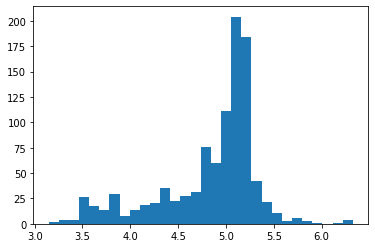

In [13]:
plt.hist(xgb_reg.predict(np.linspace(0,3.14, 1000)), bins=30)